# Analyse exploratoire des données sur le churn des clients

In [1]:
# Importation des bibliotheques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Chargement du dataset
np.random.seed(42)
n_clients = 7500

# Creation d'un dataframe aleatoire
data = pd.DataFrame({
    'ClientID': [f'CUST{i:04d}' for i in range(1, n_clients + 1)],
    'Gender' : np.random.choice(['Male', 'Female'], size=n_clients),
    'Age': np.random.randint(18, 70, size=n_clients),
    'Tenure': np.random.randint(0, 72, size=n_clients),  # par mois
    'Charges' : np.round(np.random.uniform(20, 120, size=n_clients), 2),
})

data['TotalCharges'] = np.round(data['Charges'] * data['Tenure'] + np.random.normal(0, 20, size=n_clients), 2)
data['Churn'] = np.where(
    (data['Tenure'] < 12), np.random.choice(['Yes', 'No'], size=n_clients, p=[0.4, 0.6]),
    np.random.choice(['Yes', 'No'], size=n_clients, p=[0.1, 0.9]))

data.head(10)

,ClientID,Gender,Age,Tenure,Charges,TotalCharges,Churn
0,CUST0001,Male,37,38,45.79,1762.48,No
1,CUST0002,Female,29,71,76.54,5447.56,No
2,CUST0003,Male,40,17,70.40,1185.42,No
3,CUST0004,Male,21,44,40.32,1755.59,No
4,CUST0005,Male,40,11,26.76,252.75,No
5,CUST0006,Female,65,48,37.14,1766.82,No
6,CUST0007,Male,65,30,118.44,3574.14,No
7,CUST0008,Male,18,21,66.85,1402.73,Yes
8,CUST0009,Male,42,43,106.73,4612.65,No
9,CUST0010,Female,19,63,104.88,6595.04,No


In [101]:
data.tail(10)

,ClientID,Gender,Age,Tenure,Charges,TotalCharges,Churn
7490,CUST7491,Female,35,34,106.77,3623.33,No
7491,CUST7492,Male,52,53,117.57,6185.25,No
7492,CUST7493,Male,67,23,115.24,2656.18,Yes
7493,CUST7494,Female,47,27,52.53,1394.13,No
7494,CUST7495,Female,51,21,62.17,1318.16,No
7495,CUST7496,Male,59,15,30.95,462.44,Yes
7496,CUST7497,Female,28,12,44.75,539.10,No
7497,CUST7498,Male,44,61,108.24,6616.65,No
7498,CUST7499,Male,41,42,56.08,2336.83,No
7499,CUST7500,Female,52,31,82.06,2551.24,No


In [113]:
print(data[data['ClientID'] == 'CUST7210'])

      ClientID Gender  Age  Tenure  Charges  TotalCharges Churn
7209  CUST7210   Male   43      54   114.42       6186.55    No


In [116]:
print(data.iloc[1000])

ClientID        CUST1001
Gender            Female
Age                   45
Tenure                 4
Charges            67.27
TotalCharges      269.38
Churn                 No
Name: 1000, dtype: object


## Description du jeu de données

Le jeu de données contient les informations suivantes sur 7 500 clients d'une entreprise de télécommunications:

| Variable | Description |
|----------|-------------|
| ClientID | Identifiant unique du client |
| Gender | Sexe du client (Male, Female) |
| Age | Âge du client |
| Tenure | Ancienneté du client en mois |
| Charges | Montant de la facture mensuelle ($) |
| TotalCharges | Total payé par le client |
| Churn | Si le client a quitté l'entreprise (Yes/No) |


In [117]:
# Vérifier les types de données
print(data.dtypes)

# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Résumé statistique
print(data.describe())


ClientID         object
Gender           object
Age               int32
Tenure            int32
Charges         float64
TotalCharges    float64
Churn            object
dtype: object
ClientID        0
Gender          0
Age             0
Tenure          0
Charges         0
TotalCharges    0
Churn           0
dtype: int64
              Age       Tenure     Charges  TotalCharges
count  7500.00000  7500.000000  7500.00000   7500.000000
mean     43.24360    35.416533    70.94644   2507.165701
std      14.92473    20.738084    28.90635   1879.967907
min      18.00000     0.000000    20.00000    -35.920000
25%      30.00000    17.000000    46.27000    981.527500
50%      43.00000    35.000000    71.54000   2093.175000
75%      56.00000    53.000000    95.55250   3678.382500
max      69.00000    71.000000   119.99000   8558.490000


In [103]:
# Repartition des churn
print(data['Churn'].value_counts(normalize=True))

Churn
No     0.8528
Yes    0.1472
Name: proportion, dtype: float64


In [104]:
# Moyenne des variables par churn
print(data.groupby('Churn')[['Age', 'Tenure', 'Charges', 'TotalCharges']].mean())

             Age     Tenure    Charges  TotalCharges
Churn                                               
No     43.212633  37.092245  70.818829   2621.971654
Yes    43.423007  25.708333  71.685752   1842.039909


In [105]:
# Analyse par genre
print(data.groupby(['Gender', 'Churn']).size().unstack())

Churn     No  Yes
Gender           
Female  3174  558
Male    3222  546


In [106]:
# Correlations
correlation_matrix = data[['Age', 'Tenure', 'Charges', 'TotalCharges']].corr()
print(correlation_matrix)

                   Age    Tenure   Charges  TotalCharges
Age           1.000000 -0.001458 -0.010210     -0.010760
Tenure       -0.001458  1.000000 -0.008808      0.776159
Charges      -0.010210 -0.008808  1.000000      0.537828
TotalCharges -0.010760  0.776159  0.537828      1.000000


## Visualisations

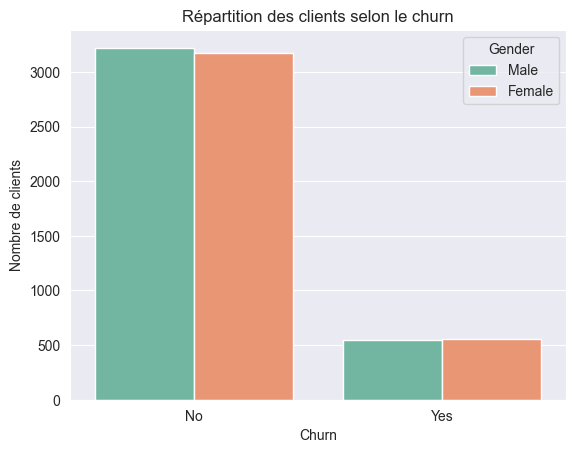

In [121]:
sns.countplot(data=data, x='Churn', palette='Set2', hue='Gender')
plt.title("Répartition des clients selon le churn")
plt.xlabel("Churn")
plt.ylabel("Nombre de clients")
plt.show()

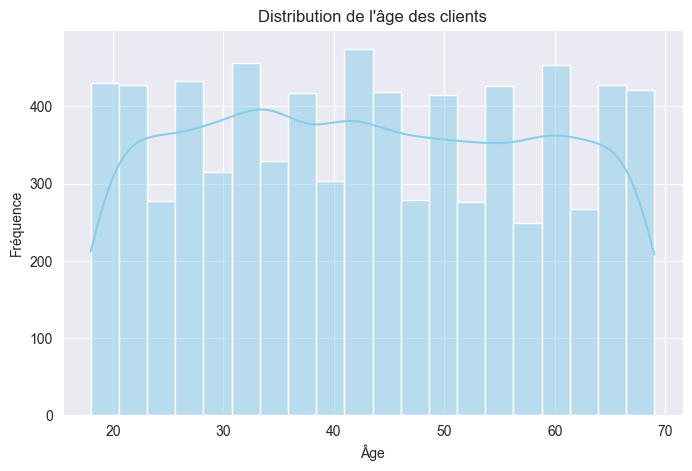

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

C:\Users\lgeov\AppData\Local\Temp\ipykernel_27252\1161781694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='Charges', palette='Pastel1')


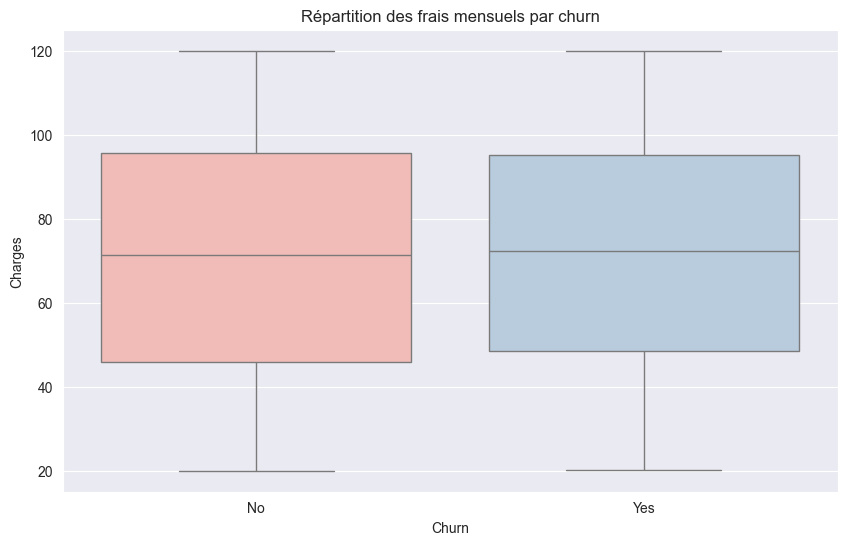

C:\Users\lgeov\AppData\Local\Temp\ipykernel_27252\1161781694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='Tenure', palette='Pastel2')


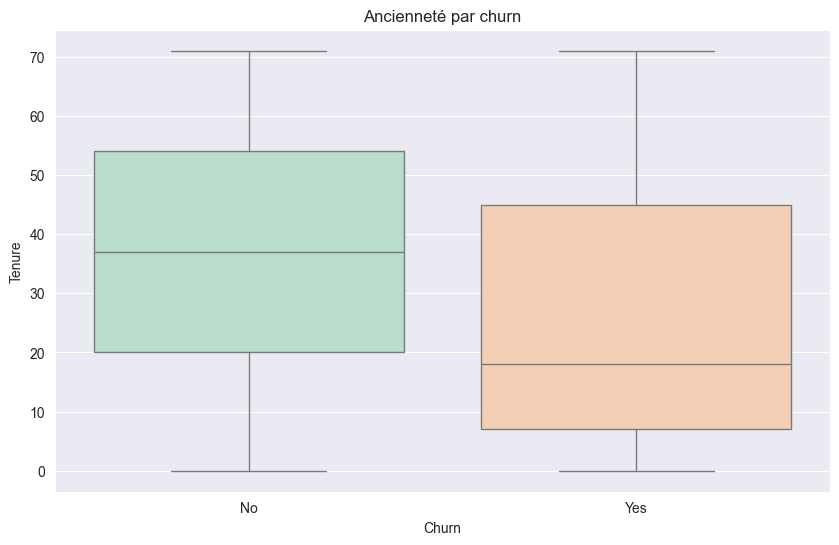

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Churn', y='Charges', palette='Pastel1')
plt.title("Répartition des frais mensuels par churn")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Churn', y='Tenure', palette='Pastel2')
plt.title("Ancienneté par churn")
plt.show()

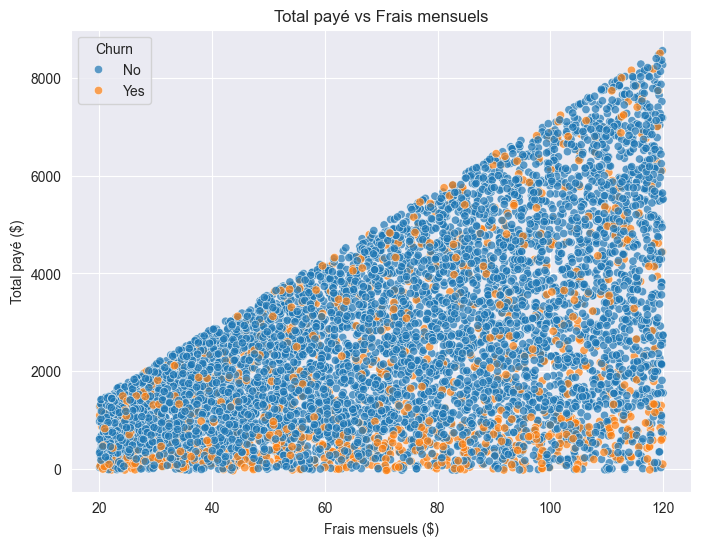

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Charges', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title("Total payé vs Frais mensuels")
plt.xlabel("Frais mensuels ($)")
plt.ylabel("Total payé ($)")
plt.show()

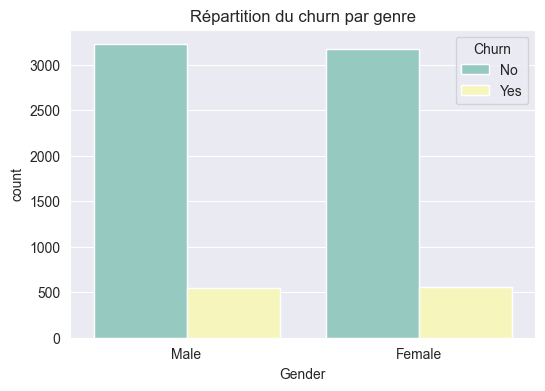

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender', hue='Churn', palette='Set3')
plt.title("Répartition du churn par genre")
plt.show()

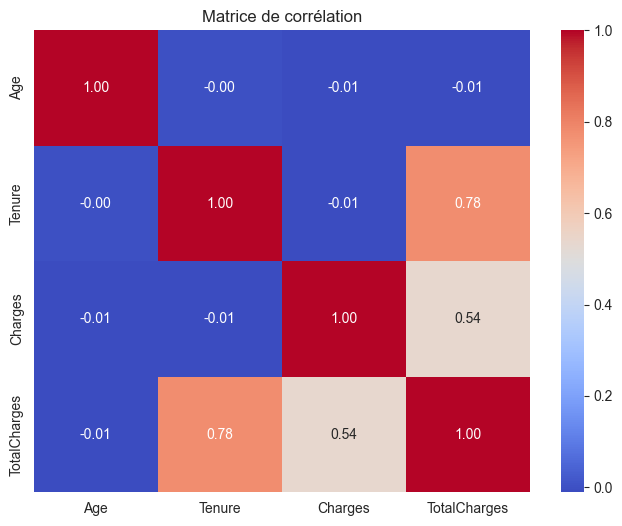

In [112]:
plt.figure(figsize=(8,6))
corr_matrix = data[['Age', 'Tenure', 'Charges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()